=========================================================================================================================================

                                                                Exploratory Data Analysis  
                                                                        EDA Part

=========================================================================================================================================

In [1]:
pwd

'C:\\Users\\prade\\OneDrive\\Desktop\\Freelance\\heba'

=) Loading The Dataset

In [2]:
import pandas as pd
import numpy as np
Data = pd.read_csv("cannabis.csv")
Data.tail()

,Strain,Type,Rating,Flavor,Effects,Medical_usage,Description
2346,Zeus-Og,hybrid,4.7,"Earthy,Woody,Pine","Happy,Uplifted,Relaxed,Euphoric,Energetic",NaN,Zeus OG is a hybrid cross between Pineapple OG...
2347,Zkittlez,indica,4.6,"Sweet,Berry,Grape","Relaxed,Happy,Euphoric,Uplifted,Sleepy",NaN,Zkittlez is an indica-dominant mix of Grape Ap...
2348,Zombie-Kush,indica,5.0,"Earthy,Sweet,Spicy/Herbal","Relaxed,Sleepy,Talkative,Euphoric,Happy",NaN,Zombie Kush by Ripper Seeds comes from two dif...
2349,Zombie-Og,indica,4.4,"Sweet,Earthy,Pungent","Relaxed,Sleepy,Euphoric,Happy,Hungry",NaN,If you’re looking to transform into a flesh-ea...
2350,Zoom-Pie,indica,4.6,"Berry,Earthy,Pungent","Hungry,Relaxed,Uplifted,Happy,Sleepy",NaN,Zoom Pie (also known as Zombie Pie) is a heavy...


                                ===================================================
                    
=) Checking The Columns Which Containins Nan Values

In [3]:
Data.isna().any()

Strain           False
Type             False
Rating           False
Flavor            True
Effects          False
Medical_usage     True
Description       True
dtype: bool

                                ==========================================================
            
=) Drop Nan Values of all Columns Except "Medical_usage"

In [4]:
Data_ = Data.loc[:, Data.columns != 'Medical_usage'].dropna(axis=0)
Data_['Medical_usage'] = Data['Medical_usage']
print(Data_.isna().any())
Data_.shape

Strain           False
Type             False
Rating           False
Flavor           False
Effects          False
Description      False
Medical_usage     True
dtype: bool


(2277, 7)

                                ===========================================================
Plotting the count ranges of different "ratings" in Rating column

In [5]:
print(Data_.Rating.value_counts())
ax = Data_.Rating.value_counts().plot(kind='bar', figsize=(10, 10))
ax.set_xlabel("Rates")
ax.set_ylabel("Number of training Samples Per Rate")
ax.set_title("Ratings ranges")

4.5    309
4.3    295
4.4    283
4.6    238
4.2    218
5.0    199
4.7    161
4.8    156
4.1     94
4.0     93
0.0     66
4.9     59
3.9     28
3.8     19
3.7     13
3.0     13
3.6     10
3.5      8
3.4      5
3.3      3
3.2      2
2.0      2
3.1      1
1.0      1
2.8      1
Name: Rating, dtype: int64


Text(0.5, 1.0, 'Ratings ranges')

                ===================================================

=) Plotting Different types Count of Type column

hybrid    1169
indica     680
sativa     428
Name: Type, dtype: int64


Text(0.5, 1.0, 'Type ranges')

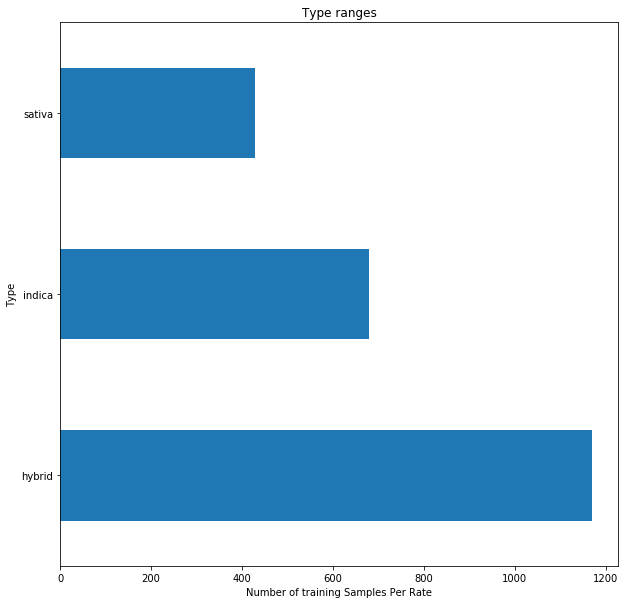

In [6]:
print(Data_.Type.value_counts())
ay = Data_.Type.value_counts().plot(kind='barh', figsize=(10, 10))
ay.set_xlabel("Number of training Samples Per Rate")
ay.set_ylabel("Type")
ay.set_title("Type ranges")

         ==============================================================

  1) Getting Unique Flavors of Flavor column, then count for each its number times of occurance.
  
  2) Print The Table of Unique Flavors along with its number of occurances per dataset

  3) Plot the count ranges of Flavor column

      
  FLAVOR        COUNT  
    
  Ammonia       28     
  Apple         16     
  Apricot       8      
  Berry         352    
  Blue          151    
  Blueberry     144    
  Butter        19     
  Cheese        63     
  Chemical      36     
  Chestnut      7      
  Citrus        518    
  Coffee        24     
  Diesel        237    
  Earthy        1093   
  Flowery       265    
  Fruit         31     
  Grape         161    
  Grapefruit    38     
  Honey         31     
  Lavender      37     
  Lemon         190    
  Lime          52     
  Mango         32     
  Menthol       22     
  Mint          54     
  Minty         41     
  None          110    
  Nutty         25     
  Orange        76     
  Peach         6      
  Pear          3      
  Pepper        58     
  Pine          330    
  Pineapple     41     
  Plum          2      
  Pungent       441    
  Rose          16     
  Sage          39     
  Skunk         169    
  Spicy/Herbal  225    
  St

Text(0.5, 1.0, "Flavors' ranges")

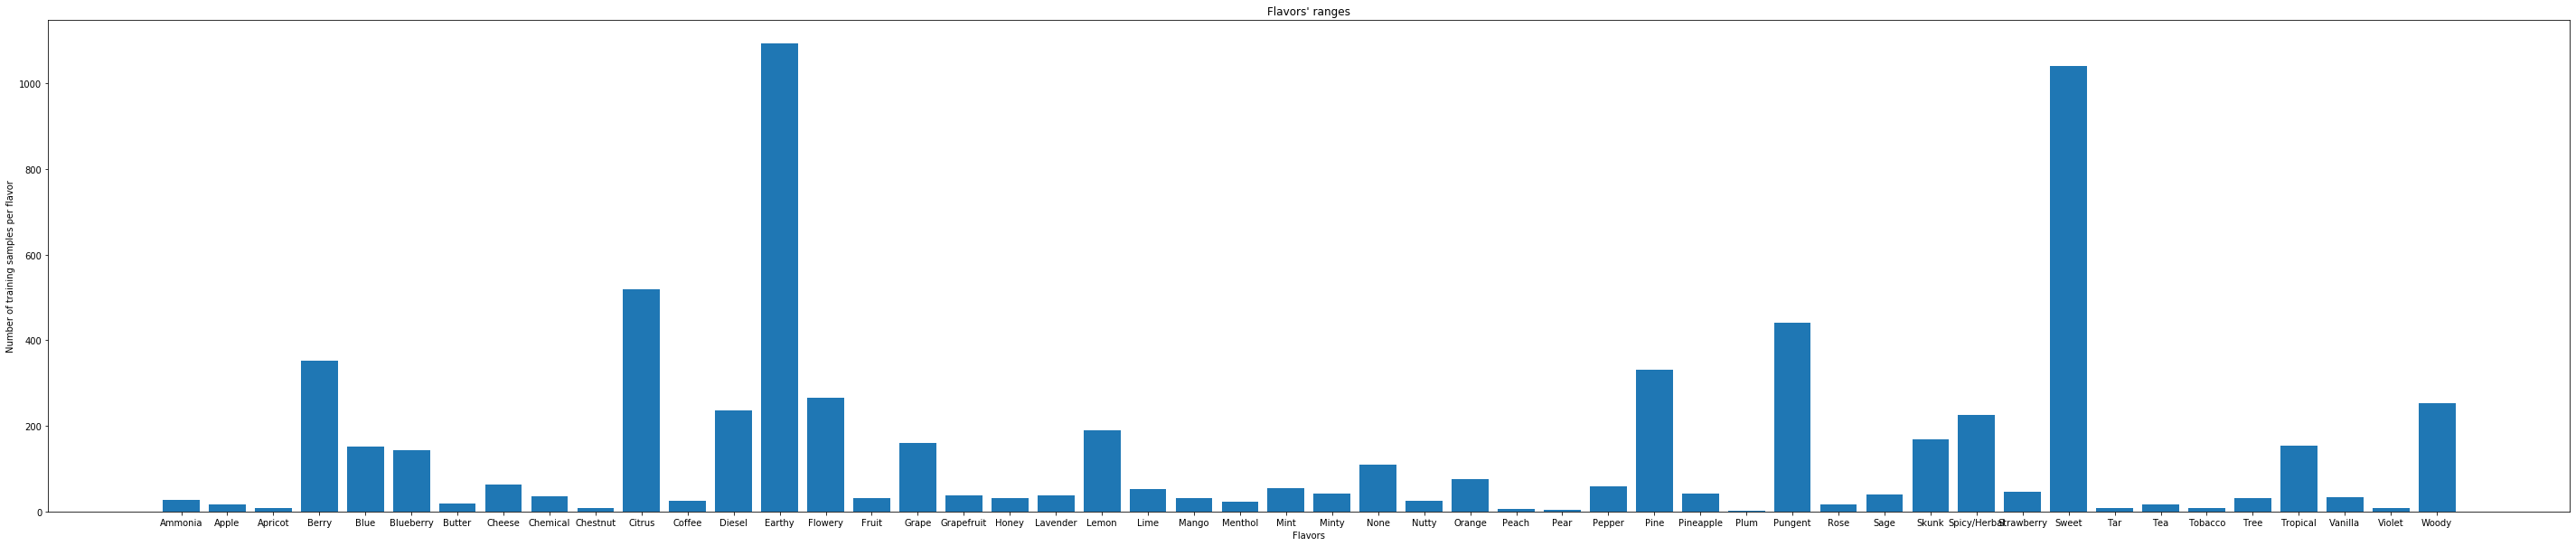

In [7]:
from itertools import chain 
Flavors = sorted(list(set(list(chain(*[str(X).split(",") for X in Data_.Flavor])))))
Dict = {}
for x in Flavors:
    Dict[str(x)] = 0
    for y in Data_.Flavor.values:
        if x in y:
            Dict[str(x)]+=1
            
from columnar import columnar
headers = ['Flavor', 'Count']
Flavors = list(map(list, Dict.items()))
table = columnar(Flavors, headers, no_borders=True)
print(table)

import matplotlib.pyplot as plt
plt.subplots(figsize=(50,10))
plt.bar(Dict.keys(), Dict.values())
plt.xlabel("Flavors")
plt.ylabel("Number of training samples per flavor")
plt.title("Flavors' ranges")

                        =================================================================

    1) Getting Unique Effects of Effects column, then count for each its number times of occurance.
    2) Plot the count of Effects column

      
  EFFECTS    COUNT  
    
  Aroused    199    
  Creative   747    
  Dry        1      
  Energetic  646    
  Euphoric   1635   
  Focused    595    
  Giggly     298    
  Happy      1871   
  Hungry     479    
  Mouth      1      
  None       87     
  Relaxed    1726   
  Sleepy     738    
  Talkative  360    
  Tingly     346    
  Uplifted   1507   



Text(0.5, 1.0, "Effects' Ranges")

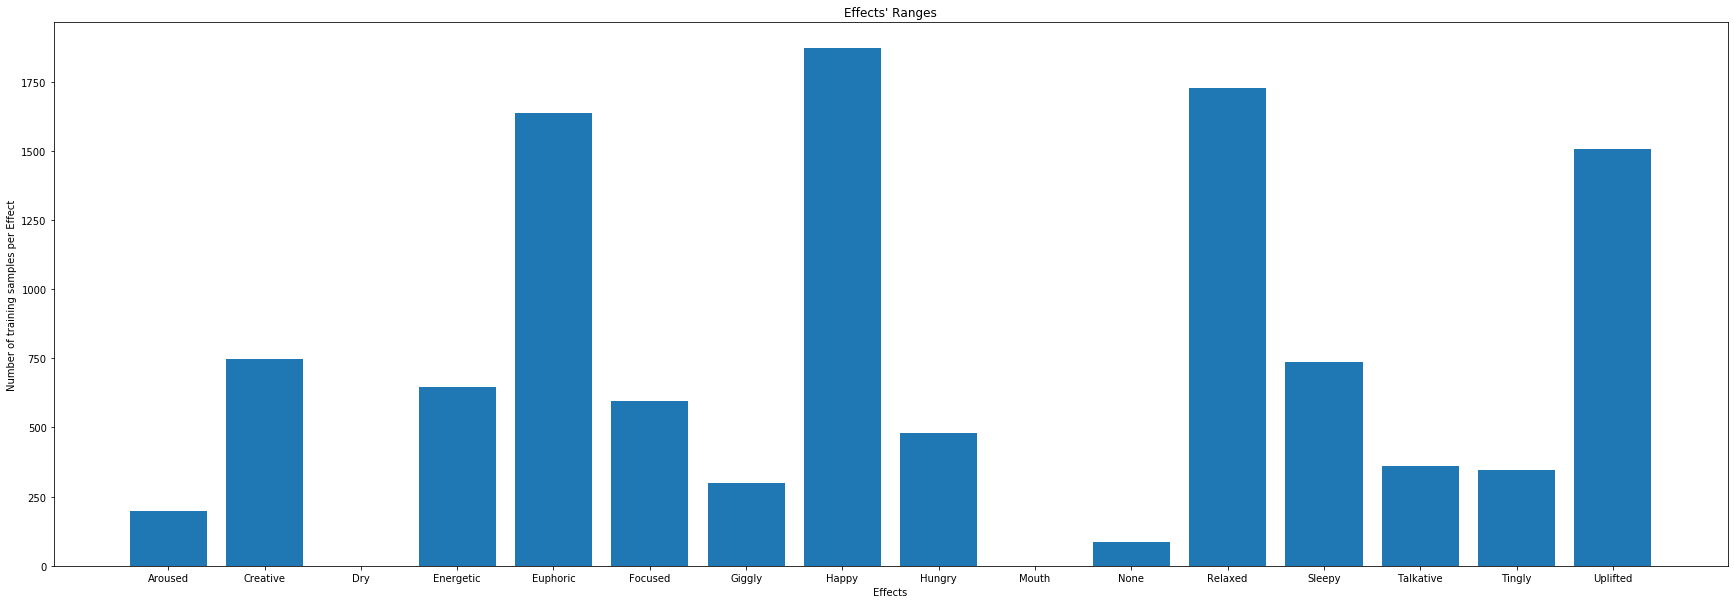

In [8]:
Effects = sorted(list(set(list(chain(*[str(X).split(",") for X in Data.Effects])))))
Dict1 = {}
for x in Effects:
    Dict1[str(x)] = 0
    for y in Data.Effects:
        if x in y:
            Dict1[str(x)]+=1

from columnar import columnar
headers = ['Effects', 'Count']
Effects = list(map(list, Dict1.items()))
table1 = columnar(Effects, headers, no_borders=True)
print(table1)

import matplotlib.pyplot as plt
plt.subplots(figsize=(30,10))
plt.bar(Dict1.keys(), Dict1.values())
plt.xlabel("Effects")
plt.ylabel("Number of training samples per Effect")
plt.title("Effects' Ranges")

                        ===========================================================

=) Plotting Medical_usage Column

Nonmedical    226
Medical       164
Name: Medical_usage, dtype: int64


Text(0.5, 1.0, 'Medical_usage Class ranges')

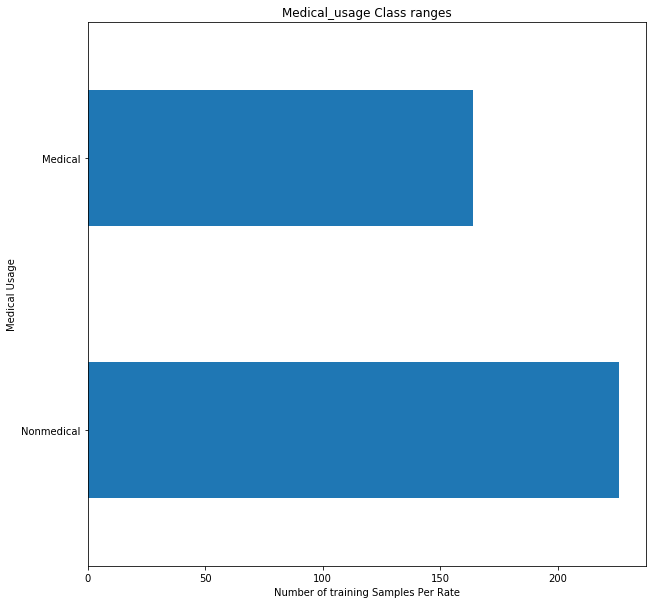

In [9]:
print(Data_.Medical_usage.value_counts())
az = Data_.Medical_usage.value_counts().plot(kind='barh', figsize=(10, 10))
az.set_xlabel("Number of training Samples Per Rate")
az.set_ylabel("Medical Usage")
az.set_title("Medical_usage Class ranges")

=========================================================================================================================================

                                                                Filling Medical_usage Column Values
                                                                     Deep Network Classifier

=========================================================================================================================================

Read only Labeled Raws which used to predict the other unlabeled Raws

Description Raw Data is a text Document Represents The Context of the category wheather "Medical" or "Nonmedical"

In [10]:
DF = Data[["Description", "Medical_usage"]][:401]

Medical_usage Class is imbalanced as shown in the above plot of EDA section

Resample Method is used in this sitiuation to make Data Augmentaion for "Medical" Category which smaller than "Nonmedical" Category

Advantage : Achiving Balanced Dataset, Avoiding "Bias" to the largest class during Classification the unlabeld data which implies false predictions

Medical       230
Nonmedical    230
Name: Medical_usage, dtype: int64


Text(0.5, 1.0, 'Resampled Medical_usage Column ')

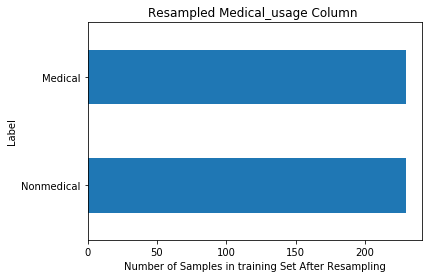

In [11]:
from sklearn.utils import resample
df_majority = DF[DF.Medical_usage=='Nonmedical']
df_minority = DF[DF.Medical_usage =='Medical']
df_minority_upsampled = resample(df_minority, replace=True, n_samples=230, random_state=123)
 
DF_ = pd.concat([df_majority, df_minority_upsampled])

print(DF_.Medical_usage.value_counts())
ay = DF_.Medical_usage.value_counts(sort=False).plot(kind='barh')
ay.set_xlabel("Number of Samples in training Set After Resampling")
ay.set_ylabel("Label")
ay.set_title("Resampled Medical_usage Column ")

                                  ==========================================================

=) Making Some Feature Engineering on Description Column (i.e removing stopwords, lower, and lemmatiza the discription column)

In [12]:
DF_ = DF_.sample(frac=1).reset_index(drop=True)
X = DF_.Description
Y = DF_.Medical_usage

from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

X = X.str.lower()
X = X.apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(item) for item in x.split() if item not in stop]))

=) Apply LabelEncoder:: from text labels(i.e "Medical", "Nonmedical") into binary labels (i.e 0 or 1)

In [13]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Y_ = Encoder.fit_transform(Y)

=) Splitting The Dataset Into Train & Test Sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_, test_size=0.30,random_state=109)

1) Apply "Tokenizer" to Split and Extract Vocabulary from Text Data.

2) Transform each sentence sequence into numeric sequence as defined in tokenizer object.

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
Obj = Tokenizer(oov_token=1)
Obj.fit_on_texts(Data_.Description)

X_train1 = Obj.texts_to_sequences(X_train)
X_test1 = Obj.texts_to_sequences(X_test)

1) Defining Some Important Parameters :: 

    Max_len represents The maximum number of words in X_train sentences.
    Vocab_size represents the number of vocabulary which's extracted in Tokenizer Object.
    Embed_Dim represents Embedding Diminsionality in Embedding Layer in the network.

2) Pad_sequences appends "zeros" to let all sequence equally in size


In [16]:
Max_len = max([len(x) for x in X_train1])
Vocab_size = len(Obj.word_index) + 1
Embed_Dim = 50
X_train_ = pad_sequences(X_train1, padding='post', maxlen=Max_len)
X_test_ = pad_sequences(X_test1, padding='post', maxlen=Max_len)

=) Prepare Glove Pre-trained Embeddings (text vectorizer)

In [17]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.50d.txt', mode='rt', encoding='utf-8')
for line in f:
    
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((Vocab_size, 50))
for word, i in Obj.word_index.items():
    
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


=) Designing The Recurrent Network Architicture using Bidirectional GRU

In [18]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import LSTM, Bidirectional, Dropout, GRU, TimeDistributed
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from keras.optimizers import Adam, SGD
from keras import regularizers
from keras.optimizers import RMSprop

np.random.seed(7)

RNN = Sequential()
RNN.add(Embedding(Vocab_size, Embed_Dim, weights=[embedding_matrix], input_length=Max_len, trainable=False))

RNN.add(Bidirectional(GRU(50, input_shape=(X_train_.shape[0],), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), bias_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), return_sequences=True, activation="relu")))
RNN.add(Dropout(0.2))
RNN.add(Flatten())

RNN.add(Dense(1, activation="sigmoid"))
RNN.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
print(RNN.summary())
model_ = RNN.fit(X_train_, Y_train, validation_data=(X_test_, Y_test), epochs=100, callbacks=[es], verbose=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 105, 50)           529700    
_________________________________________________________________
bidirectional (Bidirectional (None, 105, 100)          30600     
_________________________________________________________________
dropout (Dropout)            (None, 105, 100)          0         
_________________________________________________________________
flatten (Flatten)            (None, 10500)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10501     
Total params: 570,801
Trainable params: 41,101
Non-trainable params: 529,700
_________________________________________________________________
None
Epoch 1/100
11/11 [==============================] - 1s 66ms/step - loss: 2.0853 - accuracy: 0.5155 - val_

                         ==================================================================

=) Plot The Training History

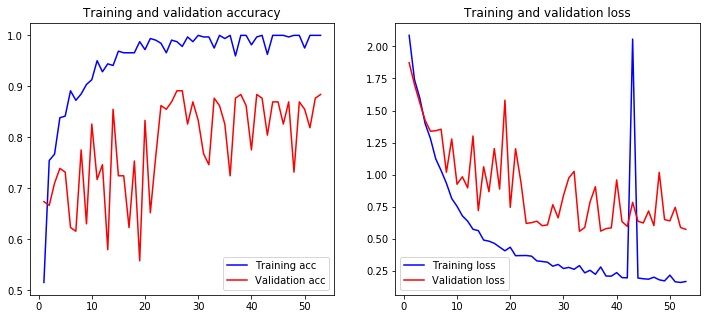

In [19]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(model_)

                                  =========================================================================

=) After Finishing Training process, Save The Model, and 

    1) Generate Confusion Matrix

    2) Generate The Classification Report 

    3) Printing The Training & Testing Accuracies

In [20]:
#RNN.save("RNN_93%")
Predictions = RNN.predict_classes(X_test_)
cm = confusion_matrix(Y_test,Predictions)
print("RNN's Confusion Matrix :\n ", cm)
print("RNN's REPORT :\n ", classification_report(Y_test, Predictions))
loss_tr, accuracy_tr = RNN.evaluate(X_train_, Y_train, verbose=False)
print("Training Accuracy: {:.2f}".format(accuracy_tr * 100))
loss_ts, accuracy_ts = RNN.evaluate(X_test_, Y_test, verbose=False)
print("Testing Accuracy:  {:.2f}".format(accuracy_ts * 100))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
RNN's Confusion Matrix :
  [[56  8]
 [ 8 66]]
RNN's REPORT :
                precision    recall  f1-score   support

           0       0.88      0.88      0.88        64
           1       0.89      0.89      0.89        74

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138

Training Accuracy: 100.00
Testing Accuracy:  88.41


                        =====================================================================

=) Plotting The Confusion Matrix

[Text(0, 0.5, 'Non-Medical'), Text(0, 1.5, 'Medical')]

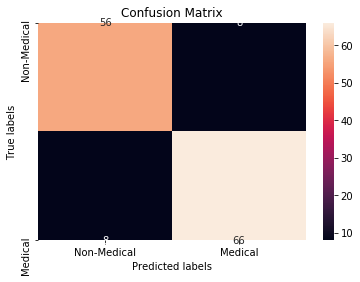

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Medical', 'Medical'])
ax.yaxis.set_ticklabels(['Non-Medical', 'Medical'])

                 =======================================================================

=) Read the rest of Medical_usage column to make predictions and fill the null values

In [22]:
DF_ = Data_[["Description", "Medical_usage"]][401:]
X_ = DF_.Description.str.lower()
X_ = DF_.Description.apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(item) for item in str(x).split() if item not in stop]))
X_Pred = Obj.texts_to_sequences(X_)
X_Pred_ = pad_sequences(X_Pred, padding='post', maxlen=Max_len)

=) Use the saved model to predict the rest of samples unlabled in the dataset

In [23]:
from keras.models import load_model
import itertools

Model = load_model("RNN_93%")
Predictions = list(itertools.chain(*Model.predict_classes(X_Pred_)))
Predictions_ = ["Nonmedical" if x==1 else "Medical" for x in Predictions]
_Predictions_ = [DF_.Medical_usage.tolist()]
_Predictions_.append(Predictions_)
_Predictions_ = list(itertools.chain(*_Predictions_))
DF_.Medical_usage = pd.DataFrame(_Predictions_, columns=["Medical_usage"])
DF_.head()
DD = pd.concat([Data_.Medical_usage.iloc[:401], DF_.Medical_usage])
Data_.Medical_usage = DD
Data_.to_csv("cannabis_1.csv")
Data_.tail(10)

,Strain,Type,Rating,Flavor,Effects,Description,Medical_usage
2341,Yummy,hybrid,4.2,"Sweet,Earthy,Pungent","Uplifted,Relaxed,Happy,Energetic,Euphoric",Yummy is an indica-dominant hybrid that hails ...,Nonmedical
2342,Zamaldelica,sativa,5.0,None,"Tingly,Uplifted,Energetic",Zamaldelica by Ace Seeds is a potent sativa-do...,Nonmedical
2343,Zellys-Gift,sativa,5.0,"Sweet,Citrus,Lime","Happy,Uplifted,Energetic,Relaxed,Euphoric",Zelly’s Gift by Dragonfly Earth Medicine is a ...,Medical
2344,Zen,hybrid,4.3,"Earthy,Sweet,Flowery","Happy,Energetic,Uplifted,Euphoric,Focused","With a balanced ratio of THC and CBD, Zen is t...",Medical
2345,Zeta-Sage,sativa,4.5,"Diesel,Pungent,Sage","Happy,Relaxed,Uplifted,Euphoric,Focused",Zeta Sage is a sativa-dominant hybrid that com...,Nonmedical
2346,Zeus-Og,hybrid,4.7,"Earthy,Woody,Pine","Happy,Uplifted,Relaxed,Euphoric,Energetic",Zeus OG is a hybrid cross between Pineapple OG...,Nonmedical
2347,Zkittlez,indica,4.6,"Sweet,Berry,Grape","Relaxed,Happy,Euphoric,Uplifted,Sleepy",Zkittlez is an indica-dominant mix of Grape Ap...,Nonmedical
2348,Zombie-Kush,indica,5.0,"Earthy,Sweet,Spicy/Herbal","Relaxed,Sleepy,Talkative,Euphoric,Happy",Zombie Kush by Ripper Seeds comes from two dif...,Nonmedical
2349,Zombie-Og,indica,4.4,"Sweet,Earthy,Pungent","Relaxed,Sleepy,Euphoric,Happy,Hungry",If you’re looking to transform into a flesh-ea...,Nonmedical
2350,Zoom-Pie,indica,4.6,"Berry,Earthy,Pungent","Hungry,Relaxed,Uplifted,Happy,Sleepy",Zoom Pie (also known as Zombie Pie) is a heavy...,Nonmedical


=) Check the whole column's balance after filling the unlabled samples

Nonmedical    559
Medical       289
Name: Medical_usage, dtype: int64


Text(0, 0.5, 'Label')

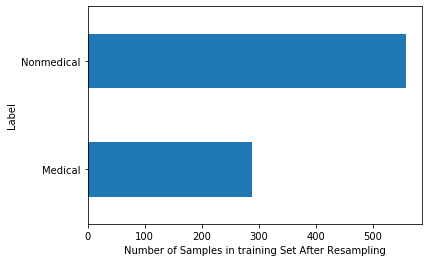

In [24]:
print(Data_.Medical_usage.value_counts())
ay = Data_.Medical_usage.value_counts(sort=False).plot(kind='barh')
ay.set_xlabel("Number of Samples in training Set After Resampling")
ay.set_ylabel("Label")

=========================================================================================================================================

                                                                    Recommender System Part
                                                                Using Cosine Similarity Method 

=========================================================================================================================================

=) Create New DataFrame holds the columns of interest for recommendations
    
        Strains Column, Rating Column, (Effects, Medical_usage) Combined together

In [25]:
Data_ = pd.read_csv("cannabis_1.csv")
pd.set_option('max_colwidth', 100)
DF = pd.DataFrame()
DF['Strain'] = Data_["Strain"]
DF['Ratings'] = Data_['Rating']
DF['Combined_attributes'] = pd.Series(Data_[['Effects', 'Medical_usage', 'Flavor', 'Type']].fillna('').values.tolist()).str.join(',')
DF = DF.dropna()
DF.tail()

,Strain,Ratings,Combined_attributes
2272,Zeus-Og,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic,Nonmedical,Earthy,Woody,Pine,hybrid"
2273,Zkittlez,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy,Nonmedical,Sweet,Berry,Grape,indica"
2274,Zombie-Kush,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy,Nonmedical,Earthy,Sweet,Spicy/Herbal,indica"
2275,Zombie-Og,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry,Nonmedical,Sweet,Earthy,Pungent,indica"
2276,Zoom-Pie,4.6,"Hungry,Relaxed,Uplifted,Happy,Sleepy,Nonmedical,Berry,Earthy,Pungent,indica"


                         ============================================================

=) Applying some feature engineering techniques (i.e Lower, lemmatize "Combined_attributes" Column)

In [26]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

DF.Combined_attributes = DF.Combined_attributes.str.lower()
DF.Combined_attributes = DF.Combined_attributes.apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(item) for item in x.split(",")]))

=) Initialize The TFIDF Vectorizer's Object to convert Text into numeric matrix

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', min_df=0.003, smooth_idf=True, use_idf=True)

=) Preparing the pipeline of recommendations extraction

    linear_kernel:: Is the Method that computes the angle between two vectors (i.e If the angle is small, so the two vectors are similar and close too much)
    linear_kernel is the same as "cosine_similarity" method but it's faster.
    
    indices :: Represent a pandas Series, Wich contains The "Combined_attributes" as an index to make matches with the raw input for similarity check, and The index of "Strain" Column 
    to get The recommended Strain Indecies from the original Dataset
        
    DF:: Represents The Dataset of (Strain, Ratings, Combined_attributes)
    tfidf_matrix:: Represents the Vectors of Combined_attributes after applying TFIDF Vectorizer on it (Turning Text documents into numeric vectors)
    Rate_Scale:: Represents a scale between 0 and 1 as a normalized "Ratings" column, useful for more accurate similarities
    
=) For each TFIDF vector of (Combined_attributes), append corresponding raw (Rating_scale) value likewise finally [Vector values of Effects, Vector value of Medical_usage class, Rating scale value]
    Cos_Sim:: Represents 2D Matrix which holds the similarity score between each raw and all raws of the dataset pairs indixed by the index of the original dataset.
    Scores:: represented as (Raw index, list of similarity Scores of this raw with all data raws in pairs)
    Best_Scores:: Represents the Descending order of the scores to get largest ten scores.
    Recommended_Strains:: Holds the Indecies of the ten largest scored raws in the original dataset 
    Strains:: Uses "Recommended_Strains" to Get Strains' names from the original dataset
    Final_DF:: Represents The important Information to be Displayed (INDEX "Recommended Strains Indecies", "RECOMMENDED_STRAINS " Strains Names, SCORE "How much recommended based on the input aspects") 

In [28]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import normalize 
from scipy.sparse import csr_matrix

indices = pd.Series(DF.Strain.index, index=DF.Combined_attributes).drop_duplicates()
print(indices.head())

def Get_Strain_Recommendations(Effects, Medical_class, Flavor, Type, Rate, DF = DF):
    Combined_attributes = " ".join([" ".join(Effects.split(",")), Medical_class, " ".join(Flavor.split(",")), Type]).lower()
    DF = DF.append({"Combined_attributes" : Combined_attributes, "Ratings" : Rate}, ignore_index=True)
    tfidf_matrix = (vectorizer.fit_transform(DF.Combined_attributes))
    tfidf_Matrix = tfidf_matrix.todense().tolist()
    Rate_scale = normalize([DF.Ratings]).tolist()
    Rate_scale = list(chain(*Rate_scale))
    for indx, vector in enumerate(tfidf_Matrix):
        vector.append(Rate_scale[indx])
    tfidf_Matrix_sp = csr_matrix(tfidf_Matrix)
    Cos_Sim = linear_kernel(tfidf_Matrix_sp, tfidf_Matrix_sp)
    indices = pd.Series(DF.Strain.index, index=DF.Combined_attributes).drop_duplicates()
    indx = indices[Combined_attributes]
    Scores = list(enumerate(Cos_Sim[indx]))
    Best_Scores = sorted(Scores, key=lambda x: x[1], reverse=True)[1:11]
    Recommended_Strains = [x[0] for x in Best_Scores]
    Strains = DF.Strain.iloc[Recommended_Strains]
    Final_DF = pd.DataFrame()
    Final_DF['INDEX'] = Recommended_Strains
    Final_DF['RECOMMENDED_STRAINS'] = Strains.values.tolist()
    Final_DF['SCORE'] = [x[1] for x in Best_Scores]
    return Final_DF

Combined_attributes
creative energetic tingly euphoric relaxed medical earthy sweet citrus hybrid          0
relaxed aroused creative happy energetic medical flowery violet diesel hybrid          1
uplifted happy relaxed energetic creative nonmedical spicy/herbal sage woody sativa    2
tingly creative hungry relaxed uplifted medical apricot citrus grapefruit hybrid       3
happy relaxed euphoric uplifted talkative nonmedical citrus earthy orange hybrid       4
dtype: int64


================================================================
                                
                                Testing
                                
================================================================

                           

In [32]:
Get_Strain_Recommendations("creative, energetic, tingly, euphoric, relaxed", "medical", "earthy,citrus", "hybird", 4.0)

,INDEX,RECOMMENDED_STRAINS,SCORE
0,0,100-Og,0.933969
1,1972,Sunburn,0.716723
2,172,Bay-11,0.714175
3,2004,Supernatural,0.707444
4,124,Area-51,0.697077
5,98,Alpine-Star,0.691160
6,1991,Super-Silver-Haze,0.669686
7,1971,Sun-Ra,0.653017
8,225,Black-Ice,0.640584
9,1985,Super-G,0.637325


In [34]:
Results = Get_Strain_Recommendations("creative, energetic, tingly, euphoric, relaxed", "medical", "earthy,sweet,citrus", "hybird", 4.0)
print("[INFO].. RECOMMENDED STRAINS ::\n")
print(*Results.RECOMMENDED_STRAINS.values.tolist(), sep='"\t"')

[INFO].. RECOMMENDED STRAINS ::

100-Og"	"Sunburn"	"Bay-11"	"Area-51"	"Super-Silver-Haze"	"Sun-Ra"	"Black-Ice"	"Supernatural"	"Atmosphere"	"Alpine-Star
